0--->minor damage
1---> moderate damage
2---->severe damage

In [1]:
#importing the libraries
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# path = './minor_3'
# path = './moderate'
path = './severe'



In [22]:
#appending the pics to the training data list
training_data3 = []
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,(80,80))
    training_data3.append([pic])

In [23]:
# imagedata=[]
k=0
for i in training_data:
    imagedata.append(np.array(training_data3[0]).reshape(80,80,3))
    

In [24]:
np.array(imagedata).shape

(156, 80, 80, 3)

In [25]:
x_train=np.array(imagedata)

In [27]:
x_train.shape

(156, 80, 80, 3)

In [28]:
y_train=[]
for i in range(0,52):
    y_train.append(int(0))

for i in range(52,104):
    y_train.append(int(1))

for i in range(104,156):
    y_train.append(int(2))



In [29]:
y_train=np.array(y_train)
y_train.shape

(156,)

In [31]:
# converting y_train to be one hot endcoded
from tensorflow import keras
from tensorflow.keras import layers
num_classes=3
y_train = keras.utils.to_categorical(y_train, num_classes)

In [34]:
y_train.shape
# y_train[0]

(156, 3)

now our x_train and y_train is ready to use in the deep learning model

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(x_train,y_train,test_size=0.2, random_state=0)

In [36]:
X_train.shape

(124, 80, 80, 3)

In [47]:
# normalizing our values b/t 0 to 1 for better training of out model
X_train=X_train/255.0
X_test=X_test/255.0

In [38]:
X_test.shape, Y_train.shape

((32, 80, 80, 3), (124, 3))

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [59]:
input_width=80
input_height=80
input_channels=3
input_pixels=19,200

n_conv1=32
n_conv2=64
stride_conv1=1
stride_cov2=1
k_conv1=3
k_conv2=3
max_pool1_k=2
max_pool2_k=2

n_hidden=1024
n_output=3


input_size_to_hidden=(input_width//(max_pool1_k*max_pool2_k))*((input_height//(max_pool1_k*max_pool2_k)))*n_conv2

In [60]:
# creating a model
model=Sequential()

In [61]:
# conv1-->maxpool1---->conv2--->maxpool2---->flatten()--->hiddenlaeyr1--->output-->ans

# adding layers to the model
model.add(Conv2D(n_conv1, (k_conv1, k_conv1),padding="SAME",input_shape=(80,80,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(max_pool1_k, max_pool1_k)))
  
model.add(Conv2D(n_conv2, (k_conv2, k_conv2),padding="SAME"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(max_pool2_k, max_pool2_k)))

# flatteing the mages before passing through the dense layer
model.add(Flatten())
# hl1
model.add(Dense(units=n_hidden,activation='relu'))
# adding a dropout layer
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=n_output,activation='sigmoid'))


In [62]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
model.fit(X_train,Y_train,epochs=20,batch_size=25, validation_data=(X_test,Y_test))

Epoch 1/20
5/5 [==============================] - 4s 706ms/step - loss: 0.4547 - accuracy: 0.8226 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 2/20
5/5 [==============================] - 1s 268ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 8.5009e-04 - val_accuracy: 1.0000
Epoch 3/20
5/5 [==============================] - 1s 277ms/step - loss: 5.1480e-04 - accuracy: 1.0000 - val_loss: 2.8780e-05 - val_accuracy: 1.0000
Epoch 4/20
5/5 [==============================] - 1s 287ms/step - loss: 1.6008e-05 - accuracy: 1.0000 - val_loss: 1.2100e-06 - val_accuracy: 1.0000
Epoch 5/20
5/5 [==============================] - 1s 269ms/step - loss: 2.1990e-06 - accuracy: 1.0000 - val_loss: 3.2156e-07 - val_accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 1s 274ms/step - loss: 1.2377e-06 - accuracy: 1.0000 - val_loss: 2.0931e-07 - val_accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 1s 292ms/step - loss: 6.2196e-07 - accuracy: 1.0000 - val_loss: 1.4789e-07

In [67]:

model.predict(X_test[12,:].reshape(1,80,80,3))

1/1 [==============================] - 0s 127ms/step


array([[1.1452923e-08, 6.5340259e-12, 9.9999988e-01]], dtype=float32)

In [68]:
# 0 0 1 --->severe damage category

In [69]:
Y_test[12]

array([0., 0., 1.], dtype=float32)

In [70]:
# predicting correctly

<function matplotlib.pyplot.show(close=None, block=None)>

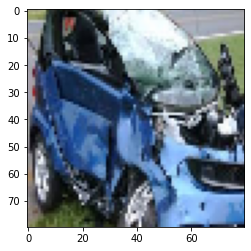

In [71]:
import matplotlib.pyplot as plt
plt.imshow(X_test[12,:])
plt.show

In [72]:
# we can see that it is severely damage
# Note before predicting we have to reshape the image to 80,80,3 as our model expect it in this format